### 用以处理 DAIC-WoZ 原始数据集
- paragraph_all: 所有语者的文本内容
- on_off_time: 所有语段对应的起止时间
- belongs: 编号-ID的映射

In [13]:
# 更改当前文件的运行路径：/home/xtz/

import os
import sys

# 获取当前文件的路径
print(os.getcwd())

# 更改当前文件的运行路径
os.chdir('/home/xtz/')
print(os.getcwd())



/home/xtz/codebase/Tools
/home/xtz


In [1]:
## 读取 new_datasets/on_off_times.pickle 文件

import pickle

with open('/home/xtz/datasets/_file/paragraph_all.pickle', 'rb') as f:
    paragraph_all = pickle.load(f)

with open('/home/xtz/datasets/_file/on_off_times.pickle', 'rb') as f:
    on_off_times = pickle.load(f)

with open('/home/xtz/datasets/_file/belongs_id.pickle', 'rb') as f:
    belongs = pickle.load(f)


In [3]:
print(len(on_off_times[0]))

87


In [3]:
## 枚举所有的段落，计算出差值最大的一对
max_diff = 0
max_diff_pair = None
for para in on_off_times:
    for pair in para:
        diff = float(pair[1]) - float(pair[0])
        if diff > max_diff and diff < 103:
            max_diff = diff
            max_diff_pair = (para.index(pair), pair)

print(max_diff, max_diff_pair)

45.08000000000004 (31, ['360.39', '405.47'])


In [8]:
## 从 files\train_split_Depression_AVEC2017.csv 提取 Participant_ID, PHQ8_Binary, PHQ8_Score, Gender
## 以 ID 为 key，存储为字典

import csv
participant_data = {}

with open('/home/xtz/datasets/_file/train_split_Depression_AVEC2017.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if int(row['Participant_ID']) in belongs:
            participant_data[int(row['Participant_ID'])] = {
                'PHQ8_Binary': int(row['PHQ8_Binary']),
                'PHQ8_Score': int(row['PHQ8_Score']),
                'Gender': row['Gender'],
                'Split': 'train'
            }

with open('/home/xtz/datasets/_file/dev_split_Depression_AVEC2017.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if int(row['Participant_ID']) in belongs:
            participant_data[int(row['Participant_ID'])] = {
                'PHQ8_Binary': int(row['PHQ8_Binary']),
                'PHQ8_Score': int(row['PHQ8_Score']),
                'Gender': row['Gender'],
                'Split': 'dev'
            }

with open('/home/xtz/datasets/_file/full_test_split.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if int(row['Participant_ID']) in belongs:
            participant_data[int(row['Participant_ID'])] = {
                'PHQ8_Binary': int(row['PHQ_Binary']),
                'PHQ8_Score': int(row['PHQ_Score']),
                'Gender': row['Gender'],
                'Split': 'test'
            }

# 按照 ID 排序
participant_data = dict(sorted(participant_data.items(), key=lambda x: x[0]))
print(participant_data)



{300: {'PHQ8_Binary': 0, 'PHQ8_Score': 2, 'Gender': '1', 'Split': 'test'}, 301: {'PHQ8_Binary': 0, 'PHQ8_Score': 3, 'Gender': '1', 'Split': 'test'}, 302: {'PHQ8_Binary': 0, 'PHQ8_Score': 4, 'Gender': '1', 'Split': 'dev'}, 303: {'PHQ8_Binary': 0, 'PHQ8_Score': 0, 'Gender': '0', 'Split': 'train'}, 304: {'PHQ8_Binary': 0, 'PHQ8_Score': 6, 'Gender': '0', 'Split': 'train'}, 305: {'PHQ8_Binary': 0, 'PHQ8_Score': 7, 'Gender': '1', 'Split': 'train'}, 306: {'PHQ8_Binary': 0, 'PHQ8_Score': 0, 'Gender': '0', 'Split': 'test'}, 307: {'PHQ8_Binary': 0, 'PHQ8_Score': 4, 'Gender': '0', 'Split': 'dev'}, 308: {'PHQ8_Binary': 1, 'PHQ8_Score': 22, 'Gender': '0', 'Split': 'test'}, 309: {'PHQ8_Binary': 1, 'PHQ8_Score': 15, 'Gender': '1', 'Split': 'test'}, 310: {'PHQ8_Binary': 0, 'PHQ8_Score': 4, 'Gender': '1', 'Split': 'train'}, 311: {'PHQ8_Binary': 1, 'PHQ8_Score': 21, 'Gender': '0', 'Split': 'test'}, 312: {'PHQ8_Binary': 0, 'PHQ8_Score': 2, 'Gender': '1', 'Split': 'train'}, 313: {'PHQ8_Binary': 0, 'PHQ8_S

In [9]:
# 将 paragraph_all belongs on_off_times 合并成一份 json 文件，以 belongs 作为key
combined_data = {}

for i, belong in enumerate(belongs):
    combined_data[belong] = (
        paragraph_all[i],
        on_off_times[i]
    )

combined_data[300]

(['good',
  'atlanta georgia',
  'um my parents are from here um',
  'i love it',
  'i like the weather',
  'i like the opportunities',
  'um',
  'yes',
  'um',
  'it took a minute',
  'somewhat easy',
  'congestion',
  "that's it",
  'um i took up business and administration',
  'uh yeah i am',
  "here and there i'm on a break right now but i plan on going back in the uh next semester",
  'uh probably to open up my own business',
  'no',
  'um no specific reason i just',
  "don't travel a lot",
  "i'm pretty local",
  'once a year',
  'can you be a little bit more specific',
  'no answer',
  'i like reading books i enjoy i enjoy cooking',
  'um exercising is great',
  "i'm i'm i'm pretty good at it",
  'um',
  'yeah',
  'um probably about',
  'two weeks ago',
  'uh frustrated',
  'um',
  "i don't like bias",
  "um i don't like um when someone says they're gonna do something and they don't",
  'uh somewhat',
  'friendship',
  'i like to play sports i enjoy uh going out with friends and

我们的第一个目标是搞出来一个以音频-文本对为单位的JSON文件，格式参考：
```c
    {
        "Unique_ID": "303_s39_AUDIO.wav",
        "Speaker_ID": "303",
        "Inner_ID": "38",
        "Audio_Path": "datasets/sample_data/303/303_s39_AUDIO.wav",
        "Audio_Length": 36.210000000000036,
        "Paragraph": "happy that...",
        "Gender": "1",
        "PHQ8_Binary": "0",
        "PHQ8_Score": 7,
        "Split": "train"
    },
```

In [15]:
import csv
import os
import json


for i, belong in enumerate(belongs):
    
    full_data = []
    participant = participant_data[belong]
    para, times = combined_data[belong]

    for j in range(len(para)):
        
        text = para[j]
        on_time, off_time = times[j][0], times[j][1]
        duration = float(off_time) - float(on_time)

        unique_id = f'{belong}_s{j+1}_AUDIO.wav'
        audio_path = f"datasets/sample_data/{belong}/" + unique_id

        if not os.path.exists(audio_path):
            raise FileNotFoundError(f"Audio file {audio_path} does not exist")
        
        full_data.append({
            'Unique_ID': unique_id,
            'Speaker_ID': belong,
            'Inner_ID': j+1,
            'Audio_Path': audio_path,
            'Audio_Length': duration,
            'Paragraph': text,
            'Gender': participant['Gender'],
            'PHQ8_Binary': participant['PHQ8_Binary'],
            'PHQ8_Score': participant['PHQ8_Score'],
            'Split': participant['Split'],
        }
        )
    
    import json
    with open(f'datasets/sample_data/{belong}/data.json', 'w') as f:
        json.dump(full_data, f, indent=4)

print("done.")

done.


In [ ]:
print(len(full_data))

with open('datasets/full_data.json', 'w') as f:
    json.dump(full_data, f, indent=4)

32401


### 做一些 Basic 的调查
- 如果剔除所有 <1s 的数据，数据留存率如何？
- 设置多大的 threshold 可以保证 50 条数据留存？

In [42]:
all_duration = 0
for i, belong in enumerate(belongs):
    
    para, times = combined_data[belong]

# ### 做一些 Basic 的调查
# - 如果剔除所有 <1s 的数据，数据留存率如何？
# - 设置多大的 threshold 可以保证 50 条数据留存？
    total_duration = 0
    num_short = 0

    for j in range(len(para)):    
        
        on_time, off_time = times[j][0], times[j][1]
        duration = float(off_time) - float(on_time)

        if duration < 1: num_short += 1
        else: total_duration += duration
    
    all_duration += total_duration
    print(f"Speaker {belong} has {len(para)-num_short} usable paragraphs. total duration is {total_duration / 60:.2f} min")

print(f"Total duration is {all_duration / 60:.2f} min")

Speaker 300 has 62 usable paragraphs. total duration is 2.28 min
Speaker 301 has 76 usable paragraphs. total duration is 7.68 min
Speaker 302 has 66 usable paragraphs. total duration is 3.17 min
Speaker 303 has 87 usable paragraphs. total duration is 10.52 min
Speaker 304 has 77 usable paragraphs. total duration is 5.75 min
Speaker 305 has 236 usable paragraphs. total duration is 17.99 min
Speaker 306 has 94 usable paragraphs. total duration is 8.32 min
Speaker 307 has 153 usable paragraphs. total duration is 13.67 min
Speaker 308 has 104 usable paragraphs. total duration is 4.86 min
Speaker 309 has 63 usable paragraphs. total duration is 2.70 min
Speaker 310 has 76 usable paragraphs. total duration is 4.12 min
Speaker 311 has 71 usable paragraphs. total duration is 2.77 min
Speaker 312 has 71 usable paragraphs. total duration is 4.74 min
Speaker 313 has 72 usable paragraphs. total duration is 3.98 min
Speaker 314 has 310 usable paragraphs. total duration is 16.21 min
Speaker 315 has 9

In [39]:
## 从 D:\\buptAI\\datasets\\PyUtils\\new_datasets\\metadata_daicwoz_crop_resample.csv 
## 提取 Participant_ID, PHQ8_Binary, PHQ8_Score, Gender
## 以 ID 为 key，存储为字典

import csv
import os
import json

data = []
counter = -1
now_speaker_id = -1
file_name = "D:\\buptAI\\datasets\\PyUtils\\datasets\\metadata_daicwoz_crop_resample.csv"

def get_audio_length(speaker_id, inner_id):
    # print(speaker_id, inner_id)
    start_time, end_time = combined_data[int(speaker_id)]["on_off_times"][int(inner_id)]
    return float(end_time) - float(start_time)

## 读取csv文件，将数据存储到 participant_data 字典中
with open(file_name, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        name = row['name']
        label = row['label']
        split = row['state']
        speaker_id = name.split('_')[0]
        inner_id = str(int(name.split('_')[1][1:])-1)
        audio_path = "datasets/sample_data/" + speaker_id + "/" + name

        if now_speaker_id != speaker_id:
            now_speaker_id = speaker_id
            counter += 1

        ## 如果 audio_path 不存在则报错
        if not os.path.exists(audio_path):
            raise FileNotFoundError(f"Audio file {audio_path} does not exist")

        audio_length = get_audio_length(speaker_id, inner_id)
        paragraph = combined_data[int(speaker_id)]["paragraphs"][int(inner_id)]
        gender = participant_data[int(new_speaker_id)]['Gender']
        phq8_score = participant_data[int(new_speaker_id)]['PHQ8_Score']
        
        data.append({
            'Unique_ID': name,
            'Speaker_ID': speaker_id,
            'Inner_ID': inner_id,
            'Audio_Path': audio_path,
            'Audio_Length': audio_length,
            'Paragraph': paragraph,
            'Gender': gender,
            'PHQ8_Binary': label,
            'PHQ8_Score': phq8_score,
            'Split': split
        })
        # counter+=1


In [40]:
len(data)

with open('datasets/data.json', 'w') as f:
    json.dump(data, f, indent=4)

In [51]:
## 反正现在就把每条音频都提取出来
### Key 有：`Unique_ID`, `Speaker_ID`, `Inner_ID`, `Audio_Path`, `Audio_Length`, `Paragraph`, `Gender`, `PHQ8_Binary`, `PHQ8_Score`

## 从 new_datasets/sample_data 中读取所有文件夹中的音频文件，将对应路径保存至 dict 中，append 到 data 中，最后保存为 json 文件

import os
import json

data = []
counter = 0

def get_audio_length(speaker_id, inner_id):
    start_time, end_time = on_off_times[int(speaker_id)][int(inner_id)]
    return float(end_time) - float(start_time)

for root, dirs, files in os.walk('datasets/sample_data'):
    # 输出文件夹中有多少.wav文件
    wav_files = [file for file in files if file.endswith('.wav')]
    #将 wav_files 按照文件名增序
    wav_files = sorted(wav_files, key=lambda x: int(os.path.splitext(x)[0]))
    
    print(f'Found {len(wav_files)} wav files in {root}')
    if len(wav_files) == 0: continue


    for wav_file in wav_files:
        # 打印 wav_file 的路径

        inner_id = os.path.splitext(wav_file)[0]
        speaker_id = root.split('\\')[-1]
        unique_id = speaker_id + '_P_' + inner_id
        audio_path = os.path.join(root, wav_file).replace('\\','/')
        audio_length = get_audio_length(counter, inner_id)  # or use a library to get the actual audio length
        paragraph = paragraph_all[counter][int(inner_id)]
        gender = participant_data[int(speaker_id)]['Gender']
        phq8_binary = participant_data[int(speaker_id)]['PHQ8_Binary']
        phq8_score = participant_data[int(speaker_id)]['PHQ8_Score']
        split = participant_data[int(speaker_id)]['Split']
        
        data.append({
            'Unique_ID': unique_id,
            'Speaker_ID': speaker_id,
            'Inner_ID': inner_id,
            'Audio_Path': audio_path,
            'Audio_Length': audio_length,
            'Paragraph': paragraph,
            'Gender': gender,
            'PHQ8_Binary': phq8_binary,
            'PHQ8_Score': phq8_score,
            'Split': split
        })

    counter += 1

with open('output_data.json', 'w') as f:
    json.dump(data, f, indent=4)

Found 0 wav files in datasets/sample_data
Found 43 wav files in datasets/sample_data\300
Found 35 wav files in datasets/sample_data\301
Found 40 wav files in datasets/sample_data\302
Found 47 wav files in datasets/sample_data\303
Found 56 wav files in datasets/sample_data\304
Found 75 wav files in datasets/sample_data\305
Found 49 wav files in datasets/sample_data\306
Found 56 wav files in datasets/sample_data\307
Found 41 wav files in datasets/sample_data\308
Found 42 wav files in datasets/sample_data\309
Found 52 wav files in datasets/sample_data\310
Found 52 wav files in datasets/sample_data\311
Found 40 wav files in datasets/sample_data\312
Found 44 wav files in datasets/sample_data\313
Found 58 wav files in datasets/sample_data\314
Found 42 wav files in datasets/sample_data\315
Found 50 wav files in datasets/sample_data\316
Found 51 wav files in datasets/sample_data\317
Found 33 wav files in datasets/sample_data\318
Found 48 wav files in datasets/sample_data\319
Found 59 wav files

C:\Users\14927\AppData\Local\Temp\ipykernel_2180\1700816840.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\14927\AppData\Local\Temp\ipykernel_2180\1700816840.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + phq_labels)


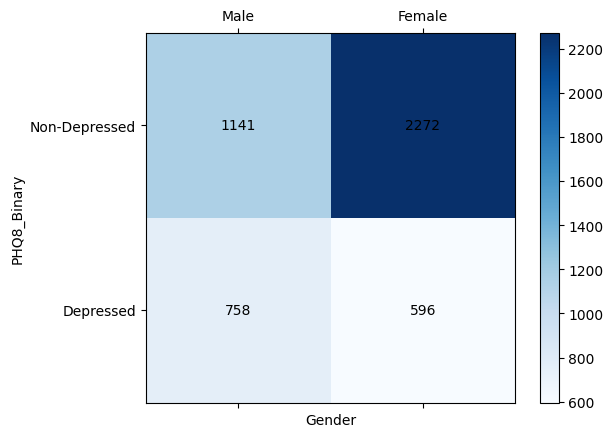

C:\Users\14927\AppData\Local\Temp\ipykernel_2180\1700816840.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\14927\AppData\Local\Temp\ipykernel_2180\1700816840.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + phq_labels)


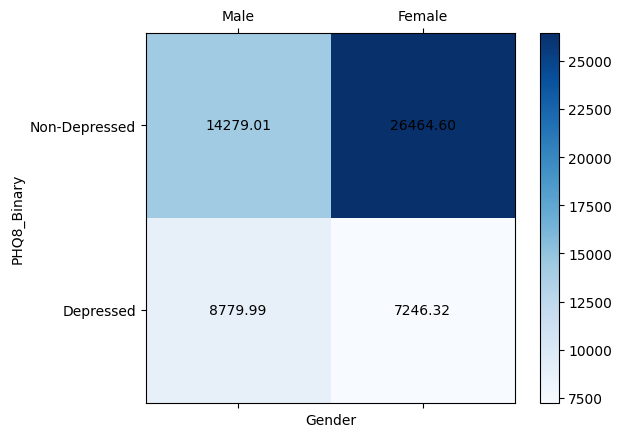

In [52]:
# 按照 PHQ8_Binary和Gender分类，统计不同类的Audio_length，绘制混淆矩阵

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

## 从 data 提取出所有 split 为 train 的数据

data = [item for item in data if item['Split'] == 'train']

# 统计 PHQ8_Binary 和 Gender 的组合数量
counter = Counter((item['PHQ8_Binary'], item['Gender']) for item in data)


# 创建混淆矩阵
labels = ['Male', 'Female']
phq_labels = ['Non-Depressed', 'Depressed']
matrix = np.zeros((2, 2), dtype=int)

for (phq, gender), count in counter.items():
    matrix[phq, int(gender)] = count

# 绘制混淆矩阵
fig, ax = plt.subplots()
cax = ax.matshow(matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# 设置轴标签
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + phq_labels)

# 设置轴标题
plt.xlabel('Gender')
plt.ylabel('PHQ8_Binary')

# 在每个单元格中添加数量
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(matrix[i, j]), va='center', ha='center')

plt.show()
# 统计不同类的Audio_length
lengths = Counter()
for item in data:
    lengths[(item['PHQ8_Binary'], item['Gender'])] += item['Audio_Length']

# 创建混淆矩阵
length_matrix = np.zeros((2, 2), dtype=float)

for (phq, gender), length in lengths.items():
    length_matrix[phq, int(gender)] = length

# 绘制混淆矩阵
fig, ax = plt.subplots()
cax = ax.matshow(length_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# 设置轴标签
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + phq_labels)

# 设置轴标题
plt.xlabel('Gender')
plt.ylabel('PHQ8_Binary')

# 在每个单元格中添加数量
for i in range(2):
    for j in range(2):
        ax.text(j, i, f'{length_matrix[i, j]:.2f}', va='center', ha='center')

plt.show()

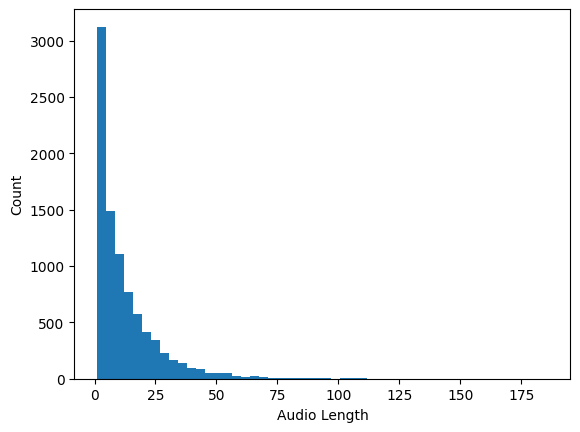

405_P_27


In [49]:
## 绘制时长的统计信息折线图

lengths = [item['Audio_Length'] for item in data]
plt.hist(lengths, bins=50)
plt.xlabel('Audio Length')
plt.ylabel('Count')
plt.show()

# 输出最长音频的Unique_ID
max_length = max(data, key=lambda x: x['Audio_Length'])
print(max_length['Unique_ID'])



In [ ]:
## 读取 datasets/data.json 文件
import json
import librosa
import soundfile as sf
import sys

## 设置当前路径为系统路径
sys.path.append('.')

with open('output_data.json', 'r') as f:
    data = json.load(f)

## 找出其中所有超过 10 秒的音频文件，将其拆分为若干 10 秒的片段，保存为新的 json 文件
new_data = []

for item in data:
    if item['Audio_Length'] > 10:
        ## 读取音频，并将音频每十秒进行截断，保存为新的音频
        audio, sr = librosa.load(item['Audio_Path'], sr=None)
        num_segments = int(np.ceil(item['Audio_Length'] / 10))

        for i in range(num_segments):
            start = i * 10
            end = min((i + 1) * 10, item['Audio_Length'])
            segment_audio = audio[int(start * sr):int(end * sr)]
            segment_path = item['Audio_Path'].replace('.wav', f'_{i}.wav')
            sf.write(segment_path, segment_audio, sr)
            
            new_item = item.copy()
            new_item['Audio_Path'] = segment_path
            new_item['Audio_Length'] = end - start
            new_item['Inner_ID'] = os.path.splitext(wav_file)[0]
            new_item['Unique_ID'] = new_item['Speaker_ID'] + '_P_' + new_item['Inner_ID']
            new_item['Paragraph'] = "No use."
            new_data.append(new_item)
    else:
        new_data.append(item)

with open('segmented_data.json', 'w') as f:
    json.dump(new_data, f, indent=4)

In [41]:
## 读取 D:\\buptAI\\datasets\\PyUtils\\new_datasets\\metadata_daicwoz_crop_resample.csv 
## 并将其中的name添加前缀"datasets/sample_data/”后保存为新的csv文件

import csv

file_name = "D:\\buptAI\\datasets\\PyUtils\\datasets\\metadata_daicwoz_crop_resample.csv"
new_file_name = "datasets/metadata_daicwoz_crop_resample_new.csv"

with open(file_name, 'r') as f:
    reader = csv.DictReader(f)
    with open(new_file_name, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=reader.fieldnames)
        writer.writeheader()
        for row in reader:
            speaker_id = row['name'].split('_')[0]
            row['name'] = 'datasets/sample_data/' + speaker_id + '/' + row['name']
            writer.writerow(row)